# Capstone Project 2 - Pitchfork.com Dataset Exploratory Data Analysis
# Michael Phillips

## Introduction

Pitchfork is one of the most influential music news and review sites currently in operation. Launched in 1995, the site has slowly grown over the years into the industry powerhouse it is today. Musical acts can achieve overnight success with a positive Pitchfork review. Bands like Arcade Fire, The National, and Deafheaven have all benefited from the Pitchfork 'bump'.

This exploration will look at preliminary metrics pulled from the data to get a sense of what the dataset holds and to provide context for the Natural Language Processing (NLP) analysis that will follow. Curiously, Pitchfork does not allow a user to filter and aggregate their reviews like I will do here. 

## The Data

The main part of this dataset is the actual review texts, which will be examined separately. 

Here we will be looking at the review 'metadata', trends within the reviews as a whole including top artists, how reviews fluctuate over time, and differences between the many reviewers Pitchfork has worked with over the years.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [105]:
df = pd.read_csv('merged_review_data.csv', index_col='Unnamed: 0')
df.head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year,genre,label
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,1998.0,electronic,virgin
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,2016.0,metal,hathenter
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,2016.0,rock,static shock
3,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,2016.0,rock,fashionable idiots
4,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,2016.0,rock,kill rock stars


## How have reviews varied over time?

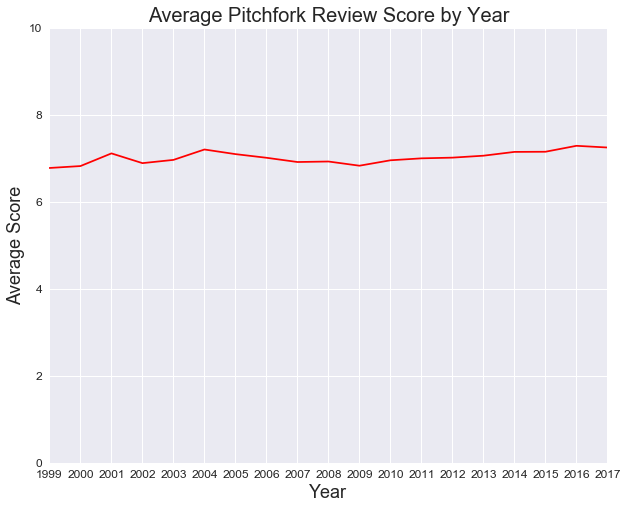

In [52]:
# change publication date to datetime object
df['pub_date'] = pd.to_datetime(df['pub_date'])

# aggregate data for plotting
year_rev = pd.pivot_table(df, index='pub_year', values='score')

# create plot
fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.plot(year_rev, color='red')

# plot formatting
min = 1999
max = 2017
plt.axis([min, max, 0, 10])
plt.xticks(np.arange(min, max+1, 1.0), fontsize=12);
plt.yticks(fontsize=12)
plt.title("Average Pitchfork Review Score by Year",fontsize=20)
plt.yticks(fontsize=12)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Average Score", fontsize=18)


# analysis

## Distribution of Scores

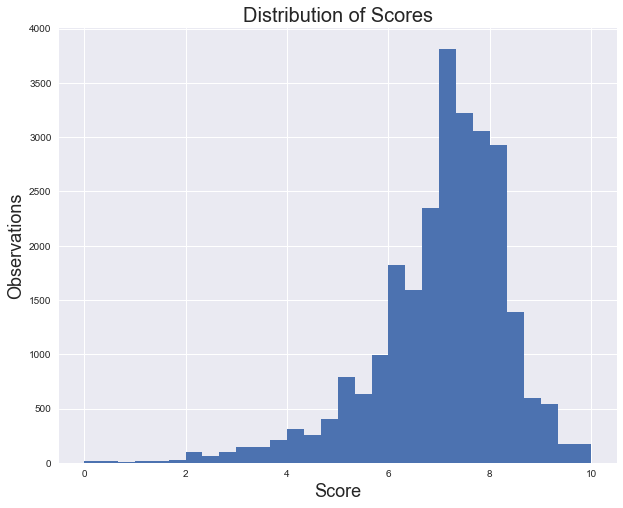

In [63]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes()

plt.title('Distribution of Scores', fontsize=20)
plt.xlabel('Score', fontsize=18)
plt.ylabel('Observations', fontsize=18)
ax.hist(df.score, bins=30);

# analysis

# Albums that received a perfect 10.0
Pitchfork rarely gives a perfect 10. Let's see which albums over the years have gotten one.

In [72]:
ten_albums = df.loc[df['score'] == 10,('title','artist')].drop_duplicates()
print("%i albums have received a 10." % len(ten_albums))

76 albums have received a 10.


In [75]:
# look at top 20 sorted alphabetically
ten_albums.sort_values(by='artist').head(20)

,title,artist
24195,source tags and codes,...and you will know us by the trail of dead
1779,people's instinctive travels and the paths of ...,a tribe called quest
12732,paul's boutique,beastie boys
21109,music has the right to children,boards of canada
264,blood on the tracks,bob dylan
25643,i see a darkness,bonnie prince billy
456,another green world,brian eno
18443,born to run: 30th anniversary edition,bruce springsteen
7887,tago mago [40th anniversary edition],can
6279,voodoo,dangelo


(1955, 2017)

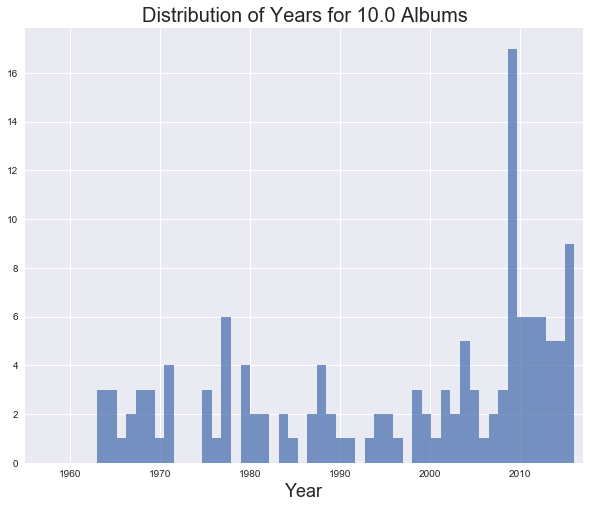

In [108]:
ten_album_years = df.loc[df['score'] == 10,('title','artist', 'year')]



ten_album_years.hist(column='year', bins=50, figsize=(10,8), alpha=0.75)
plt.title('Distribution of Years for 10.0 Albums', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.xlim([1955,2017])